<a href="https://colab.research.google.com/github/muntrans/Algoritmos_de_Optimizacion/blob/main/Descenso_de__gradiente_Jaume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descenso de gradiente

In [5]:
import math                       # Funcines matemáticas
import matplotlib.pyplot as plt   # Generación de gráficos
import numpy as np                # Tratamiento matriz N-dimensiones
import random

Vamos a buscar el mínimo de la función paraboloides por el método del descenso del gradiente:

\[f(x) = x^2 + y^2\]

Obviamente se encuentra en \((x,y)=(0,0)\) pero probaremos como llegamos a él a través del descenso del gradiente.

In [2]:
# Definimos la función (f) y el gradiente (df)
# Paraboloides
f = lambda X: X[0]**2 + X[1]**2    # Función
df = lambda X: [2*X[0], 2*X[1]]   # Gradiente

df([1,2])

[2, 4]

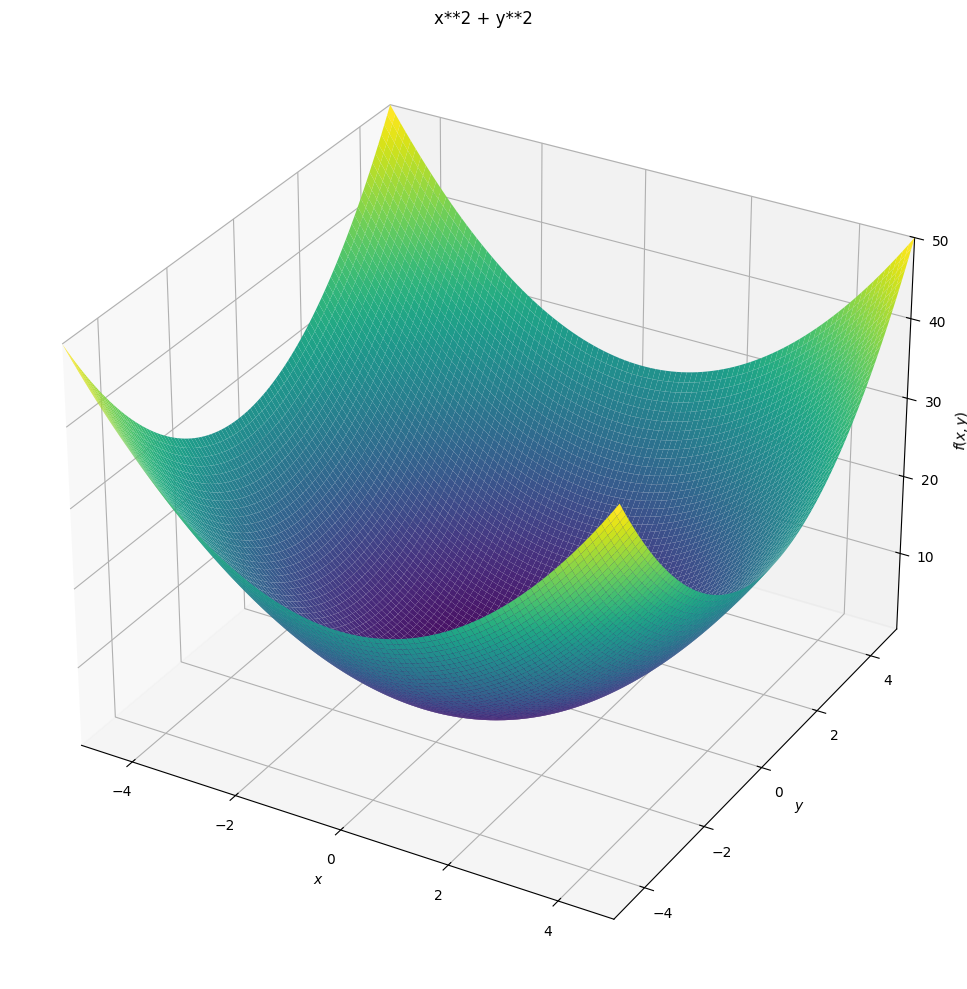

In [3]:
from sympy import symbols
from sympy.plotting import plot3d

x, y = symbols('x y')
plot3d(x**2 + y**2,
       (x, -5, 5), (y, -5, 5),
       title='x**2 + y**2',
       size=(10, 10))

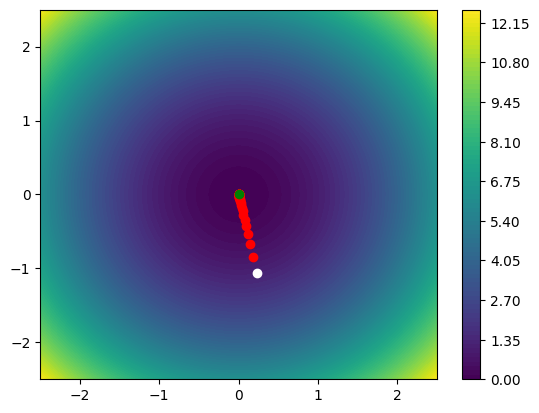

Solución: [3.337328164006696e-06, -1.5082222218481262e-05] 2.3861118632192217e-10


In [8]:
# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA = .1 # esto determina los saltos que va dando el punto

# Iteraciones: 500
for _ in range(50): # se usa _ cuando no interesa saber el indice (iteración) en la que estamos
    grad = df(P) # calculamos el gradiente para ese punto
    # print(P,grad)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1] # calcula un nuevo punto
      # Este nuevo punto es el calculo:
        # P[0] Del punto anterior en la primera coordenada
        # - TA*grad[0] menos la tasa de aprendizaje por la primera componente del gradiante
        # P[1] Segunda componente del punto en que estamos
        # - TA*grad[0] menos la tasa de aprendizaje por la segunda componente del gradiante
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("Solución:", P, f(P))

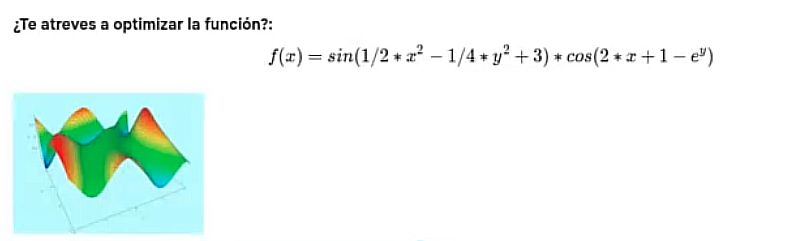

In [9]:
# Definimos la función
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

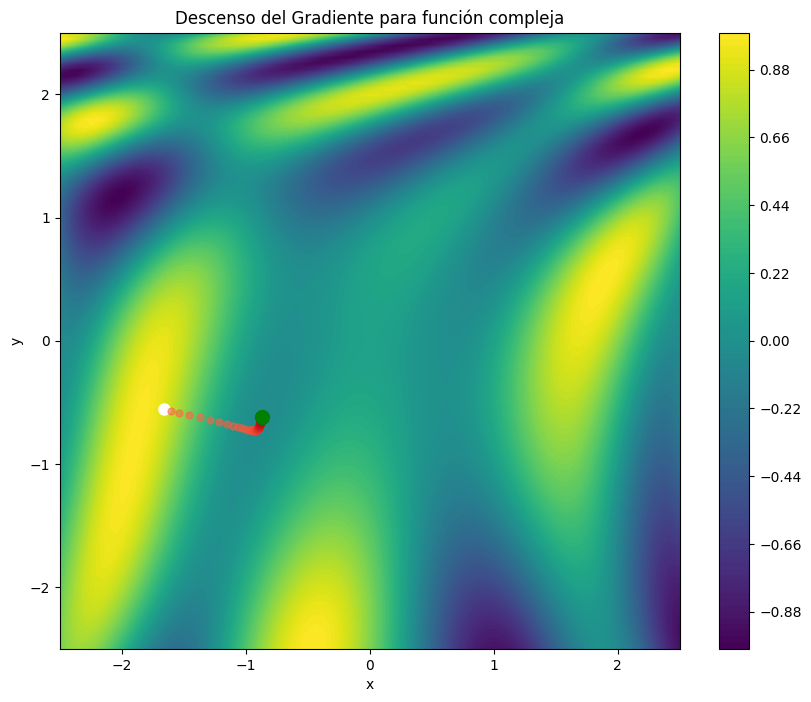

Punto inicial aproximado: [-0.8656091027447353, -0.6187416621522852]
Valor de la función en ese punto: -0.040583337534472026
Gradiente en ese punto: [-0.007324068083874813, -0.02041863480411621]


In [10]:
# Definimos el gradiente (derivadas parciales)
def df(X):
    x, y = X[0], X[1]
    term1 = math.sin(1/2 * x**2 - 1/4 * y**2 + 3)
    term2 = math.cos(2*x + 1 - math.exp(y))
    term3 = math.cos(1/2 * x**2 - 1/4 * y**2 + 3)
    term4 = math.sin(2*x + 1 - math.exp(y))

    # Derivada respecto a x
    df_dx = x * term3 * term2 - 2 * term1 * term4

    # Derivada respecto a y
    df_dy = -0.5 * y * term3 * term2 + math.exp(y) * term1 * term4

    return [df_dx, df_dy]

# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, resolucion, cmap='viridis')
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c="white", markersize=8)

# Tasa de aprendizaje (puede necesitar ajuste para esta función compleja)
TA = 0.05  # Reducido porque la función es más compleja

# Iteraciones
iteraciones = 100
for i in range(iteraciones):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]

    # Cambiamos el color según la iteración (de rojo a naranja)
    color_intensity = i / iteraciones
    plt.plot(P[0], P[1], "o", c=plt.cm.Reds(0.5 + color_intensity*0.5), markersize=5, alpha=0.6)

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green", markersize=10)
plt.title("Descenso del Gradiente para función compleja")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("Punto inicial aproximado:", P)
print("Valor de la función en ese punto:", f(P))
print("Gradiente en ese punto:", df(P))